In [2]:
%matplotlib inline
import numpy as N
import matplotlib.pyplot as P
import time
import os
import matplotlib.cm as cm
from prefig import *
from scipy.stats import kde
import matplotlib.colors as mcolors
from scipy.stats import mode
from scipy.interpolate import interp2d

In [3]:
font = {'family':'serif', 'size':20}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='medium', lw=3, facecolor='None', edgecolor='k')


X = N.linspace(0, 14, 100)
Xs = X[:-1] + N.diff(X)
Y = N.linspace(0, 4, 100)
Ys = Y[:-1] + N.diff(Y)

ti = N.arange(0, 0.01, 0.003)
t = N.linspace(0,14.0,100)
time = N.append(ti, t[1:])

In [4]:
# def bf_method2(hdt, hst, hdtau, hstau, binst, binstau):
#     cshst = N.cumsum(hst)
#     cshdt = N.cumsum(hdt)
#     cshstau = N.cumsum(hstau)
#     cshdtau = N.cumsum(hdtau)
#     idxst = N.searchsorted(cshst, [cshst[-1]*0.5, cshst[-1]*0.16, cshst[-1]*0.84])
#     idxdt = N.searchsorted(cshdt, [cshdt[-1]*0.5, cshdt[-1]*0.16, cshdt[-1]*0.84])
#     idxstau = N.searchsorted(cshstau, [cshstau[-1]*0.16, cshstau[-1]*0.84])
#     idxdtau = N.searchsorted(cshdtau, [cshdtau[-1]*0.5, cshdtau[-1]*0.16, cshdtau[-1]*0.84])
#     return N.append(N.append(binst[N.argmax(hdt)], binst[idxdt]), N.append(binstau[N.argmax(hdtau)], binstau[idxdtau])),  N.append(N.append(binst[N.argmax(hst)], binst[idxst]), N.append(binstau[N.argmax(hstau)], binstau[idxstau]))
from scipy.stats import percentileofscore as pcos
def bf_method2(hdt, hst, hdtau, hstau, binst, binstau):
    modedt = binst[N.argmax(hdt)]
    modedtau = binstau[N.argmax(hdtau)]
    print 'mode', modedtau
    modest =binst[N.argmax(hst)]
    modestau = binstau[N.argmax(hstau)]
    samphdt = []
    samphdtau = []
    samphst = []
    samphstau = []
    for n in range(len(binst)-1):
            samphdt = N.append(samphdt, (binst[n+1]-binst[n])*N.random.random(hdt[n]*100) + binst[n], axis=1)
            samphst = N.append(samphst, (binst[n+1]-binst[n])*N.random.random(hst[n]*100) + binst[n], axis=1)
            samphdtau = N.append(samphdtau, (binstau[n+1]-binstau[n])*N.random.random(hdtau[n]*100) + binstau[n], axis=1)
            samphstau = N.append(samphstau, (binstau[n+1]-binstau[n])*N.random.random(hstau[n]*100) + binstau[n], axis=1)
    mpcdt = pcos(samphdt, modedt)
    mpcst = pcos(samphst, modest)
    print 'samples', samphdtau
    mpcdtau = pcos(samphdtau, modedtau)
    print 'pos mode', mpcdtau
    mpcstau = pcos(samphstau, modestau)
    if mpcdt + 33 > 100:
        msdt, psdt = N.percentile(samphdt, [34, 100])
    elif mpcdt -33 < 0:
        msdt, psdt = N.percentile(samphdt, [0]), N.percentile(samphdt, [66])
    else:
        msdt, psdt = N.percentile(samphdt, [mpcdt-33, mpcdt+33])
        
    if mpcst + 33 > 100:
        msst, psst = N.percentile(samphst, [34]), N.percentile(samphst, [100])
    elif mpcst - 33 < 0:
        msst, psst = N.percentile(samphst, [0]), N.percentile(samphst, [66])
    else:
        msst, psst = N.percentile(samphst, [mpcst-33]), N.percentile(samphst, [mpcst+33])
        
    if mpcdtau + 33 > 100:
        msdtau, psdtau = N.percentile(samphdtau, [34]), N.percentile(samphdtau, [100])
    elif mpcdtau -33 < 0:
        msdtau, psdtau = N.percentile(samphdtau, [0]), N.percentile(samphdtau, [66])
    else:
        msdtau, psdtau = N.percentile(samphdtau, [mpcdtau-33]), N.percentile(samphdtau, [mpcdtau+33])
    print 'sides', msdtau, psdtau

    if mpcstau + 33 > 100:
        msstau, psstau = N.percentile(samphstau, [34]), N.percentile(samphstau, [100])
    elif mpcstau -33 < 0:
        msstau, psstau = N.percentile(samphstau, [0]), N.percentile(samphstau, [66])
    else:
        msstau, psstau = N.percentile(samphstau, [mpcstau-33]), N.percentile(samphstau, [mpcstau+33])
        
    return N.array([modedt, msdt, psdt, modedtau, msdtau, psdtau]), N.array([modest, msst, psst, modestau, msstau, psstau])

In [5]:
sumd = N.load('sum_weight_high_mass_bpt_type2_seyf_hardcut_disc_log_weight.npy')
sums = N.load('sum_weight_high_mass_bpt_type2_seyf_hardcut_smooth_log_weight.npy')

agnha = N.nan_to_num(N.log10(sumd))
nagnha = N.nan_to_num(N.log10(sums))

agnha[agnha < 0] = 0
nagnha[nagnha < 0] = 0

sumdha = agnha
sumsha = nagnha

xs = N.sum(sumsha, axis=1)
xsha = (xs-N.min(xs))/(N.max(xs)-N.min(xs))
ys = N.sum(sumsha, axis=0)
ysha = (ys-N.min(ys))/(N.max(ys)-N.min(ys))

ysrha = (N.sum(ysha[N.where(Ys < 1.0)])/N.sum(ysha))*100
ysiha =  (N.sum(ysha[N.where(N.logical_and(Ys > 1.0, Ys < 2.0))])/N.sum(ysha))*100
yssha =  (N.sum(ysha[N.where(Ys > 2.0)])/N.sum(ysha))*100

xd = N.sum(sumdha, axis=1)
xdha = (xd-N.min(xd))/(N.max(xd)-N.min(xd))
yd = N.sum(sumdha, axis=0)
ydha = (yd-N.min(yd))/(N.max(yd)-N.min(yd))

ydrha = (N.sum(ydha[N.where(Ys < 1.0)])/N.sum(ydha))*100
ydiha =  (N.sum(ydha[N.where(N.logical_and(Ys > 1.0, Ys < 2.0))])/N.sum(ydha))*100
ydsha =  (N.sum(ydha[N.where(Ys > 2.0)])/N.sum(ydha))*100

bfhad, bfhas = bf_method2(xdha, xsha, ydha, ysha, Xs, Ys)

mode 2.9898989899
samples [ 0.04665728  0.07940273  0.04995772 ...,  3.9734076   3.96630945
  3.99516032]
pos mode 78.3177570093
sides [ 1.7158126] [ 3.99516032]


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2

23.7224281629 26.1266292186 50.1509426185


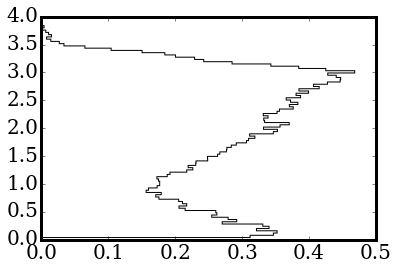

In [6]:
P.hist(Ys, weights = ysha, bins=Ys, histtype='step', color='k', orientation='horizontal', normed=True)
print ysrha, ysiha, yssha

In [7]:
print bfhad

[ 4.24242424  0.45267461  7.76652579  2.98989899  1.7158126   3.99516032]


In [8]:
sumd = N.load('sum_weight_med_mass_bpt_type2_seyf_hardcut_disc_log_weight.npy')
sums = N.load('sum_weight_med_mass_bpt_type2_seyf_hardcut_smooth_log_weight.npy')

agnma = N.nan_to_num(N.log10(sumd))
nagnma = N.nan_to_num(N.log10(sums))

agnma[agnma < 0] = 0
nagnma[nagnma < 0] = 0

sumdma = agnma
sumsma = nagnma

xs = N.sum(sumsma, axis=1)
xsma = (xs-N.min(xs))/(N.max(xs)-N.min(xs))
ys = N.sum(sumsma, axis=0)
ysma = (ys-N.min(ys))/(N.max(ys)-N.min(ys))

ysrma = (N.sum(ysma[N.where(Ys < 1.0)])/N.sum(ysma))*100
ysima =  (N.sum(ysma[N.where(N.logical_and(Ys > 1.0, Ys < 2.0))])/N.sum(ysma))*100
yssma =  (N.sum(ysma[N.where(Ys > 2.0)])/N.sum(ysma))*100

xd = N.sum(sumdma, axis=1)
xdma = (xd-N.min(xd))/(N.max(xd)-N.min(xd))
yd = N.sum(sumdma, axis=0)
ydma = (yd-N.min(yd))/(N.max(yd)-N.min(yd))

ydrma = (N.sum(ydma[N.where(Ys < 1.0)])/N.sum(ydma))*100
ydima =  (N.sum(ydma[N.where(N.logical_and(Ys > 1.0, Ys < 2.0))])/N.sum(ydma))*100
ydsma =  (N.sum(ydma[N.where(Ys > 2.0)])/N.sum(ydma))*100

bfmad, bfmas = bf_method2(xdma, xsma, ydma, ysma, Xs, Ys)

mode 3.19191919192
samples [ 0.05192166  0.06492255  0.07328535 ...,  3.85985844  3.96859235
  3.99675772]
pos mode 78.7223465076
sides [ 0.89473583] [ 3.99675772]


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2

In [9]:
sumd = N.load('sum_weight_low_mass_bpt_type2_seyf_hardcut_disc_log_weight.npy')
sums = N.load('sum_weight_low_mass_bpt_type2_seyf_hardcut_smooth_log_weight.npy')

agnla = N.nan_to_num(N.log10(sumd))
nagnla = N.nan_to_num(N.log10(sums))

agnla[agnla < 0] = 0
nagnla[nagnla < 0] = 0

sumdla = agnla
sumsla = nagnla

xs = N.sum(sumsla, axis=1)
xsla = (xs-N.min(xs))/(N.max(xs)-N.min(xs))
ys = N.sum(sumsla, axis=0)
ysla = (ys-N.min(ys))/(N.max(ys)-N.min(ys))

ysrla = (N.sum(ysla[N.where(Ys < 1.0)])/N.sum(ysla))*100
ysila =  (N.sum(ysla[N.where(N.logical_and(Ys > 1.0, Ys < 2.0))])/N.sum(ysla))*100
yssla =  (N.sum(ysla[N.where(Ys > 2.0)])/N.sum(ysla))*100

xd = N.sum(sumdla, axis=1)
xdla = (xd-N.min(xd))/(N.max(xd)-N.min(xd))
yd = N.sum(sumdla, axis=0)
ydla = (yd-N.min(yd))/(N.max(yd)-N.min(yd))

ydrla = (N.sum(ydla[N.where(Ys < 1.0)])/N.sum(ydla))*100
ydila =  (N.sum(ydla[N.where(N.logical_and(Ys > 1.0, Ys < 2.0))])/N.sum(ydla))*100
ydsla =  (N.sum(ydla[N.where(Ys > 2.0)])/N.sum(ydla))*100

bflad, bflas = bf_method2(xdla, xsla, ydla, ysla, Xs, Ys)

mode 0.0808080808081
samples [ 0.06097355  0.06559754  0.08045037 ...,  3.98113449  3.98069726
  3.99787635]
pos mode 5.02702702703
sides [ 0.0409987] [ 0.89599879]


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2

In [10]:
sumd = N.load('/Users/becky/Projects/followup_gv/bpt/sum_weight_low_mass_matched_5pc_inactive_disc_log_weight.npy')
sums = N.load('/Users/becky/Projects/followup_gv/bpt/sum_weight_low_mass_matched_5pc_inactive_smooth_log_weight.npy')

agnli = N.nan_to_num(N.log10(sumd))
nagnli = N.nan_to_num(N.log10(sums))

agnli[agnli < 0] = 0
nagnli[nagnli < 0] = 0

sumdli = agnli
sumsli = nagnli

xs = N.sum(sumsli, axis=1)
xs[xs == -N.inf] = N.min(xs[xs != -N.inf])
xsli = (xs-N.min(xs))/(N.max(xs)-N.min(xs))

ys = N.sum(sumsli, axis=0)
#ys[ys == -N.inf] = N.min(ys[ys != -N.inf])
ysli = (ys-N.min(ys))/(N.max(ys)-N.min(ys))

ysrli = (N.sum(ysli[N.where(Ys < 1.0)])/N.sum(ysli))*100
ysili =  (N.sum(ysli[N.where(N.logical_and(Ys > 1.0, Ys < 2.0))])/N.sum(ysli))*100
yssli =  (N.sum(ysli[N.where(Ys > 2.0)])/N.sum(ysli))*100

xd = N.sum(sumdli, axis=1)
xd[xd == -N.inf] = N.min(xd[xd != -N.inf])
xdli = (xd-N.min(xd))/(N.max(xd)-N.min(xd))
yd = N.sum(sumdli, axis=0)
yd[yd == -N.inf] = N.min(yd[yd != -N.inf])
ydli = (yd-N.min(yd))/(N.max(yd)-N.min(yd))

ydrli = (N.sum(ydli[N.where(Ys < 1.0)])/N.sum(ydli))*100
ydili =  (N.sum(ydli[N.where(N.logical_and(Ys > 1.0, Ys < 2.0))])/N.sum(ydli))*100
ydsli =  (N.sum(ydli[N.where(Ys > 2.0)])/N.sum(ydli))*100

bflid, bflis = bf_method2(xdli, xsli, ydli, ysli, Xs, Ys)

mode 0.0808080808081
samples [ 0.06385854  0.07492676  0.05960143 ...,  3.96643901  3.96097242
  3.98832532]
pos mode 2.10203634771
sides [ 0.04062668] [ 1.68537448]


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2

In [11]:
sumd = N.load('/Users/becky/Projects/followup_gv/bpt/sum_weight_med_mass_matched_5pc_inactive_disc_log_weight.npy')
sums = N.load('/Users/becky/Projects/followup_gv/bpt/sum_weight_med_mass_matched_5pc_inactive_smooth_log_weight.npy')

agnmi = N.nan_to_num(N.log10(sumd))
nagnmi = N.nan_to_num(N.log10(sums))

agnmi[agnmi < 0] = 0
nagnmi[nagnmi < 0] = 0

sumdmi = agnmi
sumsmi = nagnmi

xs = N.sum(sumsmi, axis=1)
xs[xs == -N.inf] = N.min(xs[xs != -N.inf])
xsmi = (xs-N.min(xs))/(N.max(xs)-N.min(xs))
ys = N.sum(sumsmi, axis=0)
ys[ys == -N.inf] = N.min(ys[ys != -N.inf])
ysmi = (ys-N.min(ys))/(N.max(ys)-N.min(ys))

ysrmi = (N.sum(ysmi[N.where(Ys < 1.0)])/N.sum(ysmi))*100
ysimi =  (N.sum(ysmi[N.where(N.logical_and(Ys > 1.0, Ys < 2.0))])/N.sum(ysmi))*100
yssmi =  (N.sum(ysmi[N.where(Ys > 2.0)])/N.sum(ysmi))*100

xd = N.sum(sumdmi, axis=1)
xd[xd == -N.inf] = N.min(xd[xd != -N.inf])
xdmi = (xd-N.min(xd))/(N.max(xd)-N.min(xd))
yd = N.sum(sumdmi, axis=0)
yd[yd == -N.inf] = N.min(yd[yd != -N.inf])
ydmi = (yd-N.min(yd))/(N.max(yd)-N.min(yd))

ydrmi = (N.sum(ydmi[N.where(Ys < 1.0)])/N.sum(ydmi))*100
ydimi =  (N.sum(ydmi[N.where(N.logical_and(Ys > 1.0, Ys < 2.0))])/N.sum(ydmi))*100
ydsmi =  (N.sum(ydmi[N.where(Ys > 2.0)])/N.sum(ydmi))*100

bfmid, bfmis = bf_method2(xdmi, xsmi, ydmi, ysmi, Xs, Ys)

mode 2.26262626263
samples [ 0.06404369  0.0742024   0.07307137 ...,  3.96286184  3.97461564
  3.99554757]
pos mode 61.7964071856
sides [ 0.84255471] [ 3.2256406]


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2

In [12]:
sumd = N.load('/Users/becky/Projects/followup_gv/bpt/sum_weight_high_mass_matched_5pc_inactive_disc_log_weight.npy')
sums = N.load('/Users/becky/Projects/followup_gv/bpt/sum_weight_high_mass_matched_5pc_inactive_smooth_log_weight.npy')

agnhi = N.nan_to_num(N.log10(sumd))
nagnhi = N.nan_to_num(N.log10(sums))

agnhi[agnhi < 0] = 0
nagnhi[nagnhi < 0] = 0

sumdhi = agnhi
sumshi = nagnhi

xs = N.sum(sumshi, axis=1)
xs[xs == -N.inf] = N.min(xs[xs != -N.inf])
xshi = (xs-N.min(xs))/(N.max(xs)-N.min(xs))
ys = N.sum(sumshi, axis=0)
ys[ys == -N.inf] = N.min(ys[ys != -N.inf])
yshi = (ys-N.min(ys))/(N.max(ys)-N.min(ys))

ysrhi = (N.sum(yshi[N.where(Ys < 1.0)])/N.sum(yshi))*100
ysihi =  (N.sum(yshi[N.where(N.logical_and(Ys > 1.0, Ys < 2.0))])/N.sum(yshi))*100
ysshi =  (N.sum(yshi[N.where(Ys > 2.0)])/N.sum(yshi))*100

xd = N.sum(sumdhi, axis=1)
xd[xd == -N.inf] = N.min(xd[xd != -N.inf])
xdhi = (xd-N.min(xd))/(N.max(xd)-N.min(xd))
yd = N.sum(sumdhi, axis=0)
yd[yd == -N.inf] = N.min(yd[yd != -N.inf])
ydhi = (yd-N.min(yd))/(N.max(yd)-N.min(yd))

ydrhi = (N.sum(ydhi[N.where(Ys < 1.0)])/N.sum(ydhi))*100
ydihi =  (N.sum(ydhi[N.where(N.logical_and(Ys > 1.0, Ys < 2.0))])/N.sum(ydhi))*100
ydshi =  (N.sum(ydhi[N.where(Ys > 2.0)])/N.sum(ydhi))*100

bfhid, bfhis = bf_method2(xdhi, xshi, ydhi, yshi, Xs, Ys)

mode 0.40404040404
samples [ 0.05241002  0.06952827  0.04778171 ...,  3.85867111  3.86091503
  3.92996883]
pos mode 14.4265697976
sides [ 0.04056111] [ 2.31837726]


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2

/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


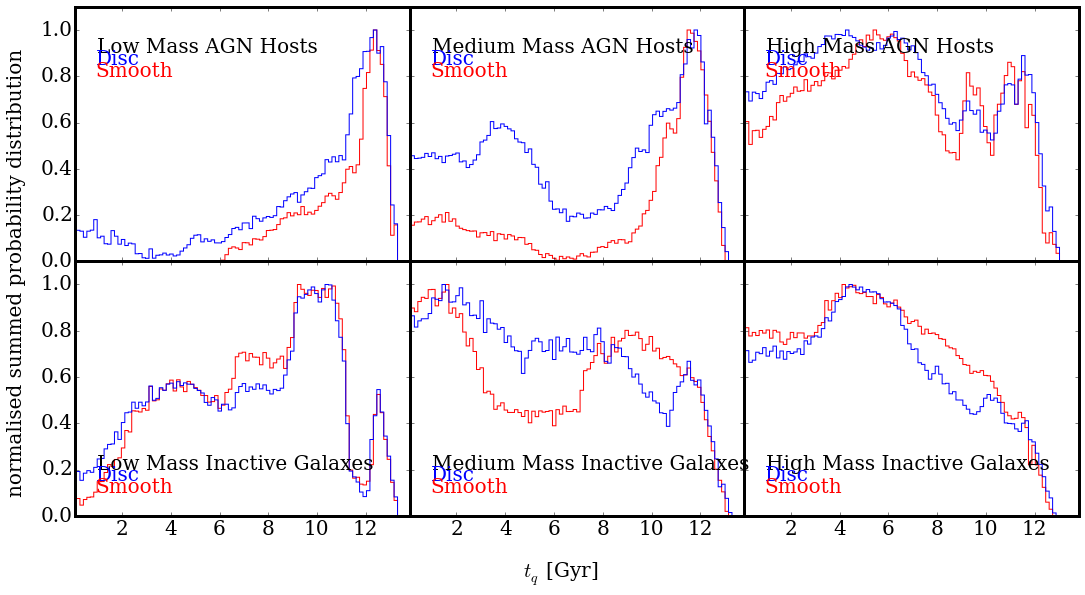

In [13]:
from mpl_toolkits.axes_grid1 import ImageGrid
F = P.figure(figsize=(15,8))
ax1 = P.subplot2grid((2,3), (0,0))
ax1.hist(Xs, weights = xsla, bins=Xs, histtype='step', color='r')
ax1.hist(Xs, weights = xdla, bins=Xs, histtype='step', color='b')
ax1.text(1, 0.9, 'Low Mass AGN Hosts')
ax1.text(1, 0.85, 'Disc', color='b')
ax1.text(1, 0.8, 'Smooth', color='r')
ax1.tick_params('x', labelbottom='off')
ax1.set_xlim(0.1, 13.8)
ax1.set_ylim(0.0, 1.1)
ax2 = P.subplot2grid((2,3), (0,1))
ax2.hist(Xs, weights = xsma, bins=Xs, histtype='step', color='r')
ax2.hist(Xs, weights = xdma, bins=Xs, histtype='step', color='b')
ax2.text(1, 0.9, 'Medium Mass AGN Hosts')
ax2.text(1, 0.85, 'Disc', color='b')
ax2.text(1, 0.8, 'Smooth', color='r')
ax2.tick_params('x', labelbottom='off')
ax2.tick_params('y', labelleft='off')
ax2.set_xlim(0.1, 13.8)
ax2.set_ylim(0.0, 1.1)
ax3 = P.subplot2grid((2,3), (0,2))
ax3.hist(Xs, weights = xsha, bins=Xs, histtype='step', color='r')
ax3.hist(Xs, weights = xdha, bins=Xs, histtype='step', color='b')
ax3.text(1, 0.9, 'High Mass AGN Hosts')
ax3.text(1, 0.85, 'Disc', color='b')
ax3.text(1, 0.8, 'Smooth', color='r')
ax3.tick_params('x', labelbottom='off')
ax3.tick_params('y', labelleft='off')
ax3.set_xlim(0.1, 13.8)
ax3.set_ylim(0.0, 1.1)
ax4 = P.subplot2grid((2,3), (1,0))
ax4.hist(Xs, weights = xsli, bins=Xs, histtype='step', color='r')
ax4.hist(Xs, weights = xdli, bins=Xs, histtype='step', color='b')
ax4.text(1, 0.2, 'Low Mass Inactive Galaxes')
ax4.text(1, 0.15, 'Disc', color='b')
ax4.text(1, 0.1, 'Smooth', color='r')
ax4.set_xlim(0.1, 13.8)
ax4.set_ylim(0.0, 1.1)
ax5 = P.subplot2grid((2,3), (1,1))
ax5.hist(Xs, weights = xsmi, bins=Xs, histtype='step', color='r')
ax5.hist(Xs, weights = xdmi, bins=Xs, histtype='step', color='b')
ax5.text(1, 0.2, 'Medium Mass Inactive Galaxes')
ax5.text(1, 0.15, 'Disc', color='b')
ax5.text(1, 0.1, 'Smooth', color='r')
ax5.tick_params('y', labelleft='off')
ax5.set_xlim(0.1, 13.8)
ax5.set_ylim(0.0, 1.1)
ax6 = P.subplot2grid((2,3), (1,2))
ax6.hist(Xs, weights = xshi, bins=Xs, histtype='step', color='r')
ax6.hist(Xs, weights = xdhi, bins=Xs, histtype='step', color='b')
ax6.text(1, 0.2, 'High Mass Inactive Galaxes')
ax6.text(1, 0.15, 'Disc', color='b')
ax6.text(1, 0.1, 'Smooth', color='r')
ax6.tick_params('y', labelleft='off')
ax6.set_xlim(0.1, 13.8)
ax6.set_ylim(0.0, 1.1)
ax_l = F.add_axes([0.01, 0.4, 0.005, 0.2])
ax_l.spines['top'].set_visible(False)
ax_l.spines['bottom'].set_visible(False)
ax_l.spines['right'].set_visible(False)
ax_l.spines['left'].set_visible(False)
ax_l.tick_params('both', bottom='off', top='off', right='off', left='off', labelbottom='off', labelleft='off')
ax_l.set_ylabel('normalised summed probability distribution')
ax_b = F.add_axes([0.4, 0.01, 0.2, 0.005])
ax_b.spines['top'].set_visible(False)
ax_b.spines['bottom'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_b.spines['left'].set_visible(False)
ax_b.tick_params('both', bottom='off', top='off', right='off', left='off', labelbottom='off', labelleft='off')
ax_b.set_xlabel('$t_q$ [Gyr]')
P.tight_layout()
P.subplots_adjust(wspace=0.0, hspace=0.0)
P.savefig('quenching_time_histograms_smooth_black_disc_blue_bpt_type2_seyf_only_hardcut.png')

In [15]:
import glob

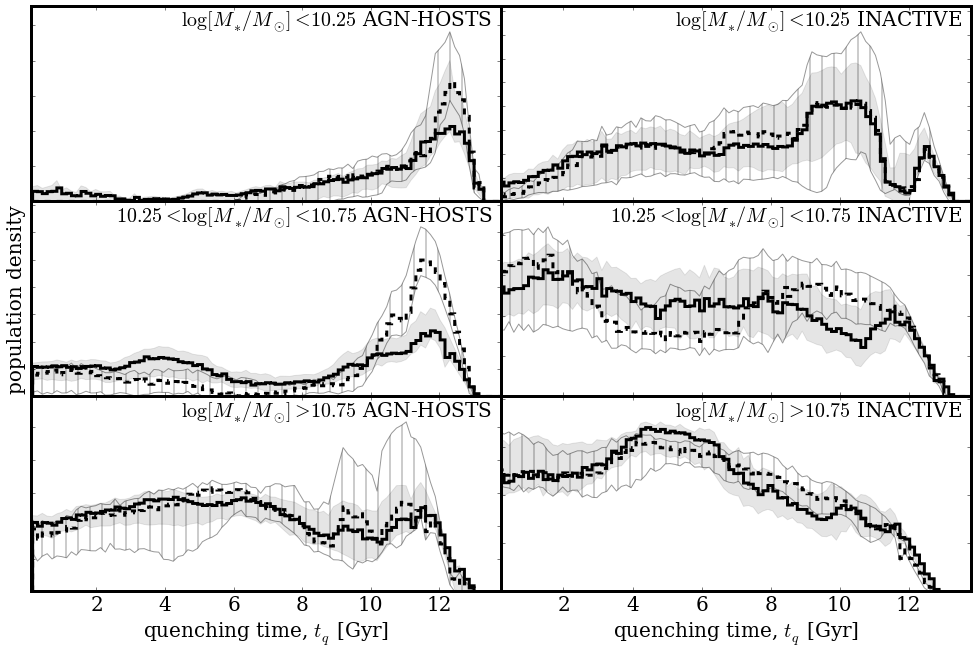

In [59]:
from mpl_toolkits.axes_grid1 import ImageGrid
F = P.figure(figsize=(14,9.5), edgecolor='None', facecolor='None')
ax1 = P.subplot2grid((3,2), (0,0))
lowstqg = glob.glob('./bootstrap/low_mass_agn_smooth_tq_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/low_mass_agn_disc_tq_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax1.fill_between(Xs, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax1.fill_between(Xs, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
xslastq = N.load('./bootstrap/expp/low_mass_agn_smooth_tq_sum_bootstrap_all_0.npy')
ax1.hist(Xs, weights = xslastq/N.sum(xslastq), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
xsladtq = N.load('./bootstrap/expp/low_mass_agn_disc_tq_sum_bootstrap_all_0.npy')
ax1.hist(Xs, weights = xsladtq/N.sum(xsladtq), bins=Xs, histtype='step', color='k', lw = 3)
ax1.set_xlim(0.1, 13.8)
ax1.tick_params('x', labelbottom='off')
ax1.tick_params('y', labelleft='off')
ax1.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax1.text(0.98, 0.9, r'$\log[M_*/M_{\odot}] < 10.25$ AGN-HOSTS', ha='right', transform=ax1.transAxes)

ax2 = P.subplot2grid((3,2), (1,0))
lowstqg = glob.glob('./bootstrap/med_mass_agn_smooth_tq_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/med_mass_agn_disc_tq_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax2.fill_between(Xs, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax2.fill_between(Xs, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
xsmastq = N.load('./bootstrap/expp/med_mass_agn_smooth_tq_sum_bootstrap_all_0.npy')
ax2.hist(Xs, weights = xsmastq/N.sum(xsmastq), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
xsmadtq = N.load('./bootstrap/expp/med_mass_agn_disc_tq_sum_bootstrap_all_0.npy')
ax2.hist(Xs, weights = xsmadtq/N.sum(xsmadtq), bins=Xs, histtype='step', color='k', lw = 3)
ax2.set_xlim(0.1, 13.8)
ax2.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax2.text(0.98, 0.9, r'$10.25 < \log[M_*/M_{\odot}] < 10.75$ AGN-HOSTS', ha='right', transform=ax2.transAxes)
ax2.tick_params('x', labelbottom='off')
ax2.tick_params('y', labelleft='off')
ax2.set_ylabel('population density')

ax3 = P.subplot2grid((3,2), (2,0))
lowstqg = glob.glob('./bootstrap/high_mass_agn_smooth_tq_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/high_mass_agn_disc_tq_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax3.fill_between(Xs, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax3.fill_between(Xs, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
xshastq = N.load('./bootstrap/expp/high_mass_agn_smooth_tq_sum_bootstrap_all_0.npy')
ax3.hist(Xs, weights = xshastq/N.sum(xshastq), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
xshadtq = N.load('./bootstrap/expp/high_mass_agn_disc_tq_sum_bootstrap_all_0.npy')
ax3.hist(Xs, weights = xshadtq/N.sum(xshadtq), bins=Xs, histtype='step', color='k', lw = 3)
#ax3.hist(Xs, weights = xsha, bins=Xs, histtype='step', color='#900000', linestyle='dashed', lw = 2)
#ax3.hist(Xs, weights = xdha, bins=Xs, histtype='step', color='b', lw = 2)
ax3.set_xlim(0.1, 13.8)
ax3.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax3.text(0.98, 0.9,  r'$ \log[M_*/M_{\odot}] > 10.75$ AGN-HOSTS', ha ='right', transform=ax3.transAxes)
ax3.set_xlabel(r'quenching time, $t_q$ [Gyr]')
ax3.tick_params('y', labelleft='off')

ax4 = P.subplot2grid((3,2), (0,1))
lowstqg = glob.glob('./bootstrap/inactive/low_mass_inactive_smooth_tq_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/inactive/low_mass_inactive_disc_tq_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax4.fill_between(Xs, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax4.fill_between(Xs, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
ax4.hist(Xs, weights = xsli/N.sum(xsli), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
ax4.hist(Xs, weights = xdli/N.sum(xdli), bins=Xs, histtype='step', color='k', lw = 3)
ax4.set_xlim(0.2, 13.8)
ax4.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax4.tick_params('both', labelbottom='off', labelleft='off')
ax4.text(0.98, 0.9,  r'$ \log[M_*/M_{\odot}] < 10.25$ INACTIVE', ha ='right', transform=ax4.transAxes)


ax5 = P.subplot2grid((3,2), (1,1))
lowstqg = glob.glob('./bootstrap/inactive/med_mass_inactive_smooth_tq_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/inactive/med_mass_inactive_disc_tq_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax5.fill_between(Xs, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax5.fill_between(Xs, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
ax5.hist(Xs, weights = xsmi/N.sum(xsmi), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
ax5.hist(Xs, weights = xdmi/N.sum(xdmi), bins=Xs, histtype='step', color='k', lw = 3)
ax5.set_xlim(0.2, 13.8)
ax5.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax5.tick_params('both', labelbottom='off', labelleft='off')
ax5.text(0.98, 0.9, r'$10.25 < \log[M_*/M_{\odot}] < 10.75$ INACTIVE', ha='right', transform=ax5.transAxes)

#ax5.set_xlabel('$t_q \rm{[Gyr]}$')
ax6 = P.subplot2grid((3,2), (2,1))
lowstqg = glob.glob('./bootstrap/inactive/high_mass_inactive_smooth_tq_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/inactive/high_mass_inactive_disc_tq_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax6.fill_between(Xs, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax6.fill_between(Xs, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
ax6.hist(Xs, weights = xshi/N.sum(xshi), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
ax6.hist(Xs, weights = xdhi/N.sum(xdhi), bins=Xs, histtype='step', color='k', lw = 3)
ax6.set_xlim(0.2, 13.8)
ax6.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax6.set_xlabel(r'quenching time, $t_q$ [Gyr]')
ax6.tick_params('y', labelleft='off')
ax6.text(0.98, 0.9,  r'$ \log[M_*/M_{\odot}] > 10.75$ INACTIVE', ha ='right', transform=ax6.transAxes)

P.tight_layout()
P.subplots_adjust(wspace=0.0, hspace=0.0)
P.savefig('quenching_time_histograms_smooth_red_disc_blue_inactive_mass_matched_5pc_sample_shaded.pdf', edgecolor='None', facecolor='None')

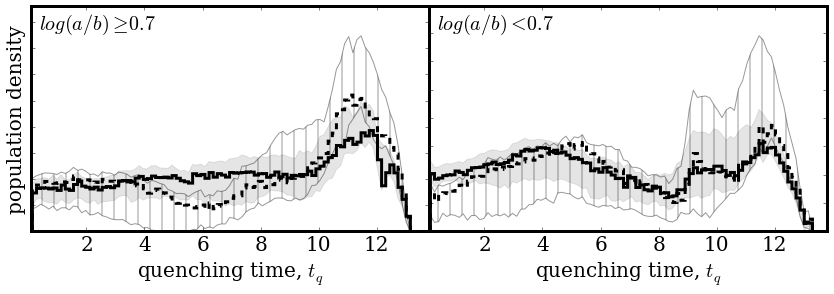

In [53]:
from mpl_toolkits.axes_grid1 import ImageGrid
F = P.figure(figsize=(12,4.5), edgecolor='None', facecolor='None')
ax1 = P.subplot2grid((1,2), (0,0))
lowstqg = glob.glob('./bootstrap/edgeface/edgeon_agn_smooth_tq_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/edgeface/edgeon_agn_disc_tq_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax1.fill_between(Xs, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
ax1.fill_between(Xs, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
xslastq = N.load('./bootstrap/edgeface/edgeon_agn_smooth_tq_sum_bootstrap_all_0.npy')
ax1.hist(Xs, weights = xslastq/N.sum(xslastq), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
xsladtq = N.load('./bootstrap/edgeface/edgeon_agn_disc_tq_sum_bootstrap_all_0.npy')
ax1.hist(Xs, weights = xsladtq/N.sum(xsladtq), bins=Xs, histtype='step', color='k', lw = 3)
ax1.set_xlim(0.1, 13.8)
ax1.tick_params('y', labelleft='off')
ax1.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax1.text(0.02, 0.9, r'$log(a/b) \geq 0.7$', ha='left', transform=ax1.transAxes)
ax1.set_ylabel('population density')
ax1.set_xlabel(r'quenching time, $t_q$')

ax2 = P.subplot2grid((1,2), (0,1))
lowstqg = glob.glob('./bootstrap/edgeface/faceon_agn_smooth_tq_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/edgeface/faceon_agn_disc_tq_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax2.fill_between(Xs, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
ax2.fill_between(Xs, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
xsmastq = N.load('./bootstrap/edgeface/faceon_agn_smooth_tq_sum_bootstrap_all_0.npy')
ax2.hist(Xs, weights = xsmastq/N.sum(xsmastq), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
xsmadtq = N.load('./bootstrap/edgeface/faceon_agn_disc_tq_sum_bootstrap_all_0.npy')
ax2.hist(Xs, weights = xsmadtq/N.sum(xsmadtq), bins=Xs, histtype='step', color='k', lw = 3)
ax2.set_xlim(0.1, 13.8)
ax2.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax2.text(0.02, 0.9, r'$log(a/b) < 0.7$', ha='left', transform=ax2.transAxes)
ax2.tick_params('y', labelleft='off')
ax2.set_xlabel(r'quenching time, $t_q$')
P.tight_layout()
P.subplots_adjust(wspace=0.0, hspace=0.0)
P.savefig('quenching_time_histograms_edgeon_faceon_shaded.pdf', edgecolor='None', facecolor='None')


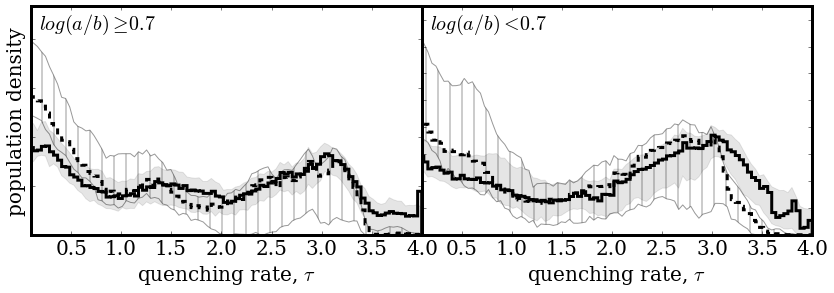

In [54]:
from mpl_toolkits.axes_grid1 import ImageGrid
F = P.figure(figsize=(12,4.5), edgecolor='None', facecolor='None')
ax1 = P.subplot2grid((1,2), (0,0))
lowstqg = glob.glob('./bootstrap/edgeface/edgeon_agn_smooth_tau_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/edgeface/edgeon_agn_disc_tau_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax1.fill_between(Ys, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
ax1.fill_between(Ys, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
xslastq = N.load('./bootstrap/edgeface/edgeon_agn_smooth_tau_sum_bootstrap_all_0.npy')
ax1.hist(Ys, weights = xslastq/N.sum(xslastq), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
xsladtq = N.load('./bootstrap/edgeface/edgeon_agn_disc_tau_sum_bootstrap_all_0.npy')
ax1.hist(Ys, weights = xsladtq/N.sum(xsladtq), bins=Ys, histtype='step', color='k', lw = 3)
ax1.set_xlim(0.1, 4.0)
ax1.tick_params('y', labelleft='off')
ax1.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax1.text(0.02, 0.9, r'$log(a/b) \geq 0.7$', ha='left', transform=ax1.transAxes)
ax1.set_ylabel('population density')
ax1.set_xlabel(r'quenching rate, $\tau$')

ax2 = P.subplot2grid((1,2), (0,1))
lowstqg = glob.glob('./bootstrap/edgeface/faceon_agn_smooth_tau_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/edgeface/faceon_agn_disc_tau_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax2.fill_between(Ys, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
ax2.fill_between(Ys, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
xsmastq = N.load('./bootstrap/edgeface/faceon_agn_smooth_tau_sum_bootstrap_all_0.npy')
ax2.hist(Ys, weights = xsmastq/N.sum(xsmastq), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
xsmadtq = N.load('./bootstrap/edgeface/faceon_agn_disc_tau_sum_bootstrap_all_0.npy')
ax2.hist(Ys, weights = xsmadtq/N.sum(xsmadtq), bins=Ys, histtype='step', color='k', lw = 3)
ax2.set_xlim(0.1, 4.0)
ax2.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax2.text(0.02, 0.9, r'$log(a/b) < 0.7$', ha='left', transform=ax2.transAxes)
ax2.tick_params('y', labelleft='off')
ax2.set_xlabel(r'quenching rate, $\tau$')
P.tight_layout()
P.subplots_adjust(wspace=0.0, hspace=0.0)
P.savefig('quenching_rate_histograms_edgeon_faceon_shaded.pdf', edgecolor='None', facecolor='None')


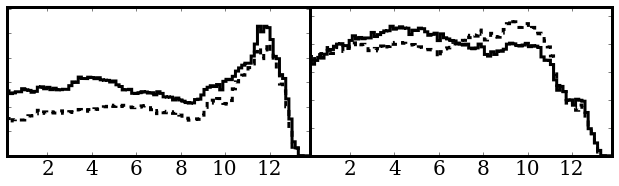

In [22]:
from mpl_toolkits.axes_grid1 import ImageGrid
F = P.figure(figsize=(9,3), edgecolor='None', facecolor='None')
ax1 = P.subplot2grid((1,2), (0,0))
ax1.hist(Xs, weights = xsla+xsma+xsha, bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
ax1.hist(Xs, weights = xdla+xdma+xdha, bins=Xs, histtype='step', color='k', lw = 3)
ax1.set_xlim(0.2, 13.8)
# ax1.axvline(bflad[0]+0.1, c='b')
# ax1.axvline(bflas[0], c='#900000')
# ax1.axvline(bflad[1], c='b', linestyle='dashed')
# ax1.axvline(bflas[1], c='#900000', linestyle='dashed')
# ax1.axvline(bflad[2], c='b', linestyle='dashed')
# ax1.axvline(bflas[2], c='#900000', linestyle='dashed')
ax1.tick_params('y', labelleft='off')
ax1.set_ylim(0, 1.15*N.max(xdla+xdma+xdha))
#ax1.text(0.98, 0.9, r'$\log[M_*/M_{\odot}] < 10.25$ AGN-HOSTS', ha='right', transform=ax1.transAxes)
#ax1.set_yticks(N.array([0.0, 0.25, 0.5, 0.75, 1.0]))
#ax1.set_yticklabels(N.array([0.0, 0.25, 0.5, 0.75, 1.0]))
ax2 = P.subplot2grid((1,2), (0,1))
ax2.hist(Xs, weights = xsli+xsmi+xshi, bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
ax2.hist(Xs, weights = xdli+xdmi+xdhi, bins=Xs, histtype='step', color='k', lw = 3)
ax2.set_xlim(0.2, 13.8)
ax2.tick_params('y', labelleft='off')
ax2.set_ylim(0, 1.15*N.max(xdli+xdmi+xdhi))
#ax2.set_ylabel('normalised density')
P.tight_layout()
P.subplots_adjust(wspace=0.0, hspace=0.0)
P.savefig('quenching_time_histograms_smooth_red_disc_blue_inactive_mass_matched_5pc_sample_pres_all_masses.pdf', edgecolor='None', facecolor='None')

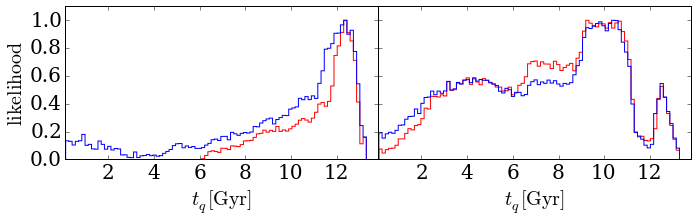

In [15]:
F = P.figure(figsize=(10,3.5))
ax5 = P.subplot2grid((1,2), (0,0))
ax5.hist(Xs, weights = xsla, bins=Xs, histtype='step', color='r')
ax5.hist(Xs, weights = xdla, bins=Xs, histtype='step', color='b')
ax5.set_xlim(0.1, 13.8)
ax5.set_ylim(0, 1.1)
#ax5.text(1.2, 0.25, 'Medium Mass Inactive Galaxies')
#ax5.text(1.2, 0.15, 'Disc', color='b')
#ax5.text(1.2, 0.05, 'Smooth', color='r')
#ax5.tick_params('both', labelbottom='off', labelleft='off')
ax5.set_ylabel(r'$\rm{likelihood}$')
ax5.set_xlabel(r'$t_q \rm{[Gyr]}$')
ax6 = P.subplot2grid((1,2), (0,1))
ax6.hist(Xs, weights = xsli, bins=Xs, histtype='step', color='r')
ax6.hist(Xs, weights = xdli, bins=Xs, histtype='step', color='b')
ax6.set_xlim(0.1, 13.8)
ax6.set_ylim(0, 1.1)
#ax6.text(1.2, 0.25, 'High Mass Inactive Galaxies')
#ax6.text(1.2, 0.15, 'Disc', color='b')
#ax6.text(1.2, 0.05, 'Smooth', color='r')
ax6.set_xlabel(r'$t_q \rm{[Gyr]}$')
ax6.tick_params('y', labelleft='off')
P.tight_layout()
P.subplots_adjust(left =0.1, wspace=0.0, hspace=0.0)
P.savefig('quenching_time_histograms_lowmass_disc_and_smooth_type2_agn.png', facecolor="None", edgecolor="None")

In [16]:
from scipy.stats import ks_2samp
print ks_2samp(xsla, xsli)
D = ((N.sum(xsla) + N.sum(xsli))/(N.sum(xsla)*N.sum(xsli)))**0.5
print 'D low', 1.22*D, 1.36*D, 1.48*D, 1.63*D, 1.73*D, 1.95*D
print ks_2samp(xsma, xsmi)
D = ((N.sum(xsma) + N.sum(xsmi))/(N.sum(xsma)*N.sum(xsmi)))**0.5
print 'D med', 1.22*D, 1.36*D, 1.48*D, 1.63*D, 1.73*D, 1.95*D
print ks_2samp(xsha, xshi)
D = ((N.sum(xsha) + N.sum(xshi))/(N.sum(xsha)*N.sum(xshi)))**0.5
print 'D high', 1.22*D, 1.36*D, 1.48*D, 1.63*D, 1.73*D, 1.95*D
print ks_2samp(xdla, xdli)
D = ((N.sum(xdla) + N.sum(xdli))/(N.sum(xdla)*N.sum(xdli)))**0.5
print 'D low', 1.22*D, 1.36*D, 1.48*D, 1.63*D, 1.73*D, 1.95*D
print ks_2samp(xdma, xdmi)
D = ((N.sum(xdma) + N.sum(xdmi))/(N.sum(xdma)*N.sum(xdmi)))**0.5
print 'D med', 1.22*D, 1.36*D, 1.48*D, 1.63*D, 1.73*D, 1.95*D
print ks_2samp(xdha, xdhi)
D = ((N.sum(xdha) + N.sum(xdhi))/(N.sum(xdha)*N.sum(xdhi)))**0.5
print 'D high', 1.22*D, 1.36*D, 1.48*D, 1.63*D, 1.73*D, 1.95*D


(0.58585858585858586, 9.3179061271900375e-16)
D low 0.363076675397 0.404741211918 0.440453671793 0.485094246637 0.514854629866 0.580327472971
(0.69696969696969702, 4.0028918937248786e-22)
D med 0.316487003753 0.352805184512 0.383935053734 0.422847390261 0.448788947945 0.505860374852
(0.18181818181818177, 0.066735471084574116)
D high 0.215793280183 0.240556443483 0.261782012026 0.288313972704 0.306001946489 0.344915488817
(0.51515151515151514, 2.7974009381034875e-12)
D low 0.307848913101 0.343175837556 0.373456058516 0.411306334717 0.436539852185 0.492053590613
(0.54545454545454541, 1.0259255399331029e-13)
D med 0.242914027639 0.27078940786 0.294682590906 0.324549069714 0.344460055586 0.388264224505
(0.28282828282828287, 0.00053442202956400153)
D high 0.215999941139 0.240786819631 0.26203271548 0.288590085292 0.306294998501 0.345245807558


In [35]:
import glob

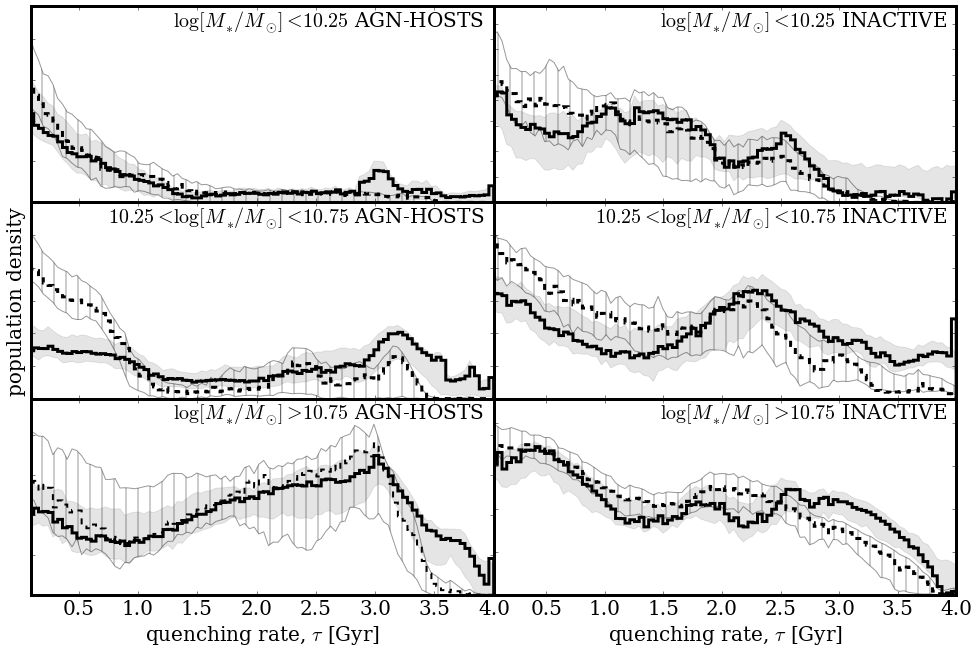

In [60]:
from mpl_toolkits.axes_grid1 import ImageGrid
F = P.figure(figsize=(14,9.5))
ax1 = P.subplot2grid((3,2), (0,0))
lowstqg = glob.glob('./bootstrap/low_mass_agn_smooth_tau_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/low_mass_agn_disc_tau_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax1.fill_between(Ys, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax1.fill_between(Ys, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
xslastq = N.load('./bootstrap/expp/low_mass_agn_smooth_tau_sum_bootstrap_all_0.npy')
ax1.hist(Ys, weights = xslastq/N.sum(xslastq), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
xsladtq = N.load('./bootstrap/expp/low_mass_agn_disc_tau_sum_bootstrap_all_0.npy')
ax1.hist(Ys, weights = xsladtq/N.sum(xsladtq), bins=Ys, histtype='step', color='k', lw = 3)
ax1.set_xlim(0.1, 4.0)
ax1.tick_params('x', labelbottom='off')
ax1.tick_params('y', labelleft='off')
ax1.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax1.text(0.98, 0.9, r'$\log[M_*/M_{\odot}] < 10.25$ AGN-HOSTS', ha='right', transform=ax1.transAxes)

ax2 = P.subplot2grid((3,2), (1,0))
lowstqg = glob.glob('./bootstrap/med_mass_agn_smooth_tau_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/med_mass_agn_disc_tau_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax2.fill_between(Ys, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax2.fill_between(Ys, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
xsmastq = N.load('./bootstrap/expp/med_mass_agn_smooth_tau_sum_bootstrap_all_0.npy')
ax2.hist(Ys, weights = xsmastq/N.sum(xsmastq), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
xsmadtq = N.load('./bootstrap/expp/med_mass_agn_disc_tau_sum_bootstrap_all_0.npy')
ax2.hist(Ys, weights = xsmadtq/N.sum(xsmadtq), bins=Ys, histtype='step', color='k', lw = 3)
ax2.set_xlim(0.1, 4.0)
ax2.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax2.text(0.98, 0.9, r'$10.25 < \log[M_*/M_{\odot}] < 10.75$ AGN-HOSTS', ha='right', transform=ax2.transAxes)
ax2.tick_params('x', labelbottom='off')
ax2.tick_params('y', labelleft='off')
ax2.set_ylabel('population density')

ax3 = P.subplot2grid((3,2), (2,0))
lowstqg = glob.glob('./bootstrap/high_mass_agn_smooth_tau_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/high_mass_agn_disc_tau_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax3.fill_between(Ys, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax3.fill_between(Ys, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
xsmastq = N.load('./bootstrap/expp/high_mass_agn_smooth_tau_sum_bootstrap_all_0.npy')
ax3.hist(Ys, weights = xsmastq/N.sum(xsmastq), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 2)
xsmadtq = N.load('./bootstrap/expp/high_mass_agn_disc_tau_sum_bootstrap_all_0.npy')
ax3.hist(Ys, weights = xsmadtq/N.sum(xsmadtq), bins=Ys, histtype='step', color='k', lw = 3)
ax3.set_xlim(0.1, 4.0)
ax3.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax3.text(0.98, 0.9,  r'$ \log[M_*/M_{\odot}] > 10.75$ AGN-HOSTS', ha ='right', transform=ax3.transAxes)
ax3.set_xlabel(r'quenching rate, $\tau$ [Gyr]')
ax3.tick_params('y', labelleft='off')

ax4 = P.subplot2grid((3,2), (0,1))
lowstqg = glob.glob('./bootstrap/inactive/low_mass_inactive_smooth_tau_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/inactive/low_mass_inactive_disc_tau_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax4.fill_between(Ys, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax4.fill_between(Ys, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
ax4.hist(Ys, weights = ysli/N.sum(ysli), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
ax4.hist(Ys, weights = ydli/N.sum(ydli), bins=Ys, histtype='step', color='k', lw = 3)
ax4.set_xlim(0.05, 4.0)
ax4.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax4.tick_params('both', labelbottom='off', labelleft='off')
ax4.text(0.98, 0.9,  r'$ \log[M_*/M_{\odot}] < 10.25$ INACTIVE', ha ='right', transform=ax4.transAxes)

ax5 = P.subplot2grid((3,2), (1,1))
lowstqg = glob.glob('./bootstrap/inactive/med_mass_inactive_smooth_tau_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/inactive/med_mass_inactive_disc_tau_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax5.fill_between(Ys, y1=minxsls, y2=maxxsls, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax5.fill_between(Ys, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
ax5.hist(Ys, weights = ysmi/N.sum(ysmi), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
ax5.hist(Ys, weights = N.percentile(xdls.T/N.sum(xdls, axis=1), 50, axis=1), bins=Ys, histtype='step', color='k', lw = 3)
ax5.set_xlim(0.05, 4.0)
ax5.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax5.tick_params('both', labelbottom='off', labelleft='off')
ax5.text(0.98, 0.9, r'$10.25 < \log[M_*/M_{\odot}] < 10.75$ INACTIVE', ha='right', transform=ax5.transAxes)

ax6 = P.subplot2grid((3,2), (2,1))
lowstqg = glob.glob('./bootstrap/inactive/high_mass_inactive_smooth_tau_sum_bootstrap_*.npy')
xsls = N.array(map(N.load, lowstqg))
maxxsls = N.max(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.min(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('./bootstrap/inactive/high_mass_inactive_disc_tau_sum_bootstrap_*.npy')
xdls = N.array(map(N.load, lowdtqg))
maxxdls = N.max(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.min(xdls.T/N.sum(xdls, axis=1), axis=1)
ax6.fill_between(Ys, y1=minxsls, y2=maxxsls,color='None', hatch='|', edgecolor='k', alpha=0.4)
ax6.fill_between(Ys, y1=minxdls, y2=maxxdls, color='k', alpha=0.1)
ax6.hist(Ys, weights = yshi/N.sum(yshi), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
ax6.hist(Ys, weights = ydhi/N.sum(ydhi), bins=Ys, histtype='step', color='k', lw = 3)
ax6.set_xlim(0.05, 4.0)
ax6.set_ylim(0, 1.15*N.max([maxxdls, maxxsls]))
ax6.set_xlabel(r'quenching rate, $\tau$ [Gyr]')
ax6.tick_params('y', labelleft='off')
ax6.text(0.98, 0.9,  r'$ \log[M_*/M_{\odot}] > 10.75$ INACTIVE', ha ='right', transform=ax6.transAxes)
             
             
P.tight_layout()
P.subplots_adjust(wspace=0.0, hspace=0.0)
P.savefig('quenching_rate_histograms_smooth_red_disc_blue_inactive_mass_matched_5pc_sample_with_mode_and_66pc_around_mode_shaded.pdf', edgecolor='None', facecolor='None')

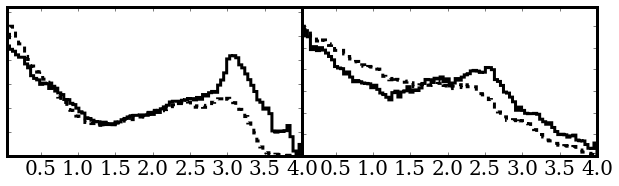

In [24]:
from mpl_toolkits.axes_grid1 import ImageGrid
F = P.figure(figsize=(9,3), edgecolor='None', facecolor='None')
ax1 = P.subplot2grid((1,2), (0,0))
ax1.hist(Ys, weights = ysla+ysma+ysha, bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
ax1.hist(Ys, weights = ydla+ydma+ydha, bins=Ys, histtype='step', color='k', lw = 3)
ax1.set_xlim(0.05, 4.0)
# ax1.axvline(bflad[0]+0.1, c='b')
# ax1.axvline(bflas[0], c='#900000')
# ax1.axvline(bflad[1], c='b', linestyle='dashed')
# ax1.axvline(bflas[1], c='#900000', linestyle='dashed')
# ax1.axvline(bflad[2], c='b', linestyle='dashed')
# ax1.axvline(bflas[2], c='#900000', linestyle='dashed')
ax1.tick_params('y', labelleft='off')
ax1.set_ylim(0, 1.15*N.max(ysla+ysma+ysha))
#ax1.text(0.98, 0.9, r'$\log[M_*/M_{\odot}] < 10.25$ AGN-HOSTS', ha='right', transform=ax1.transAxes)
#ax1.set_yticks(N.array([0.0, 0.25, 0.5, 0.75, 1.0]))
#ax1.set_yticklabels(N.array([0.0, 0.25, 0.5, 0.75, 1.0]))
ax2 = P.subplot2grid((1,2), (0,1))
ax2.hist(Ys, weights = ysli+ysmi+yshi, bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
ax2.hist(Ys, weights = ydli+ydmi+ydhi, bins=Ys, histtype='step', color='k', lw = 3)
ax2.set_xlim(0.05, 4.0)
ax2.tick_params('y', labelleft='off')
ax2.set_ylim(0, 1.15*N.max(ysli+ysmi+yshi))
#ax2.set_ylabel('normalised densyty')
P.tight_layout()
P.subplots_adjust(wspace=0.0, hspace=0.0)
P.savefig('quenching_rate_histograms_smooth_red_disc_blue_inactive_mass_matched_5pc_sample_pres_all_masses.pdf', edgecolor='None', facecolor='None')

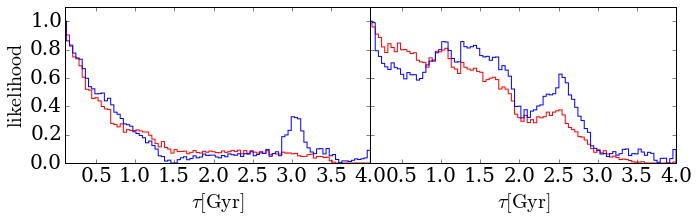

In [18]:
F = P.figure(figsize=(10,3.5))
ax5 = P.subplot2grid((1,2), (0,0))
ax5.hist(Ys, weights = ysla, bins=Ys, histtype='step', color='r')
ax5.hist(Ys, weights = ydla, bins=Ys, histtype='step', color='b')
ax5.set_xlim(0.1, 4.0)
ax5.set_ylim(0, 1.1)
#ax5.text(1.2, 0.25, 'Medium Mass Inactive Galaxies')
#ax5.text(1.2, 0.15, 'Disc', color='b')
#ax5.text(1.2, 0.05, 'Smooth', color='r')
#ax5.tick_params('both', labelbottom='off', labelleft='off')
ax5.set_ylabel(r'$\rm{likelihood}$')
ax5.set_xlabel(r'$\tau \rm{[Gyr]}$')
ax6 = P.subplot2grid((1,2), (0,1))
ax6.hist(Ys, weights = ysli, bins=Ys, histtype='step', color='r')
ax6.hist(Ys, weights = ydli, bins=Ys, histtype='step', color='b')
ax6.set_xlim(0.1, 4.0)
ax6.set_ylim(0, 1.1)
#ax6.text(1.2, 0.25, 'High Mass Inactive Galaxies')
#ax6.text(1.2, 0.15, 'Disc', color='b')
#ax6.text(1.2, 0.05, 'Smooth', color='r')
ax6.set_xlabel(r'$\tau \rm{[Gyr]}$')
ax6.tick_params('y', labelleft='off')
P.tight_layout()
P.subplots_adjust(left =0.1, wspace=0.0, hspace=0.0)
P.savefig('quenching_rate_histograms_lowmass_disc_and_smooth_type2_agn.png', facecolor="None", edgecolor="None")

In [19]:
print ks_2samp(ysla, ysli)
D = ((N.sum(ysla) + N.sum(ysli))/(N.sum(ysla)*N.sum(ysli)))**0.5
print 'D low', 1.22*D, 1.36*D, 1.48*D, 1.63*D, 1.73*D, 1.95*D
print ks_2samp(ysma, ysmi)
D = ((N.sum(ysma) + N.sum(ysmi))/(N.sum(ysma)*N.sum(ysmi)))**0.5
print 'D med', 1.22*D, 1.36*D, 1.48*D, 1.63*D, 1.73*D, 1.95*D
print ks_2samp(ysha, yshi)
D = ((N.sum(ysha) + N.sum(yshi))/(N.sum(ysha)*N.sum(yshi)))**0.5
print 'D high', 1.22*D, 1.36*D, 1.48*D, 1.63*D, 1.73*D, 1.95*D
print ks_2samp(ydla, ydli)
D = ((N.sum(ydla) + N.sum(ydli))/(N.sum(ydla)*N.sum(ydli)))**0.5
print 'D low', 1.22*D, 1.36*D, 1.48*D, 1.63*D, 1.73*D, 1.95*D
print ks_2samp(ydma, ydmi)
D = ((N.sum(ydma) + N.sum(ydmi))/(N.sum(ydma)*N.sum(ydmi)))**0.5
print 'D med', 1.22*D, 1.36*D, 1.48*D, 1.63*D, 1.73*D, 1.95*D
print ks_2samp(ydha, ydhi)
D = ((N.sum(ydha) + N.sum(ydhi))/(N.sum(ydha)*N.sum(ydhi)))**0.5
print 'D high', 1.22*D, 1.36*D, 1.48*D, 1.63*D, 1.73*D, 1.95*D



(0.47474747474747475, 1.7113054679457946e-10)
D low 0.349394608192 0.389489071427 0.4238557542 0.466814107666 0.495453009977 0.558458595061
(0.43434343434343431, 7.4826887467777402e-09)
D med 0.310859029315 0.346531376941 0.377107674907 0.415328047364 0.440808295668 0.496864841938
(0.14141414141414144, 0.25517316600868384)
D high 0.232795550254 0.259509793726 0.282407716702 0.311030120422 0.330111722902 0.372091248357
(0.48484848484848486, 6.3147634084347879e-11)
D low 0.332436262755 0.370584686349 0.403283335145 0.444156646139 0.471405520136 0.531353042928
(0.13131313131313138, 0.33780786387807543)
D med 0.26776216845 0.298488974665 0.324826237136 0.357747815224 0.379695533949 0.427980515145
(0.25252525252525249, 0.002834915795451988)
D high 0.230397702054 0.256836782618 0.279498851672 0.30782643799 0.326711495536 0.368258622136


In [20]:
print 12.99 - X[N.argmax(xdla)]
print 12.67 - X[N.argmax(xdma)]
print 12.40 - X[N.argmax(xdha)]

print N.mean([12.8 - X[N.argmax(xdla)], 12.8 - X[N.argmax(xdma)], 12.8 - X[N.argmax(xdha)]])

print 12.99 - X[N.argmax(xsla)]
print 12.67 - X[N.argmax(xsma)]
print 12.40 - X[N.argmax(xsha)]

print N.mean([12.8 - X[N.argmax(xsla)], 12.8 - X[N.argmax(xsma)], 12.8 - X[N.argmax(xsha)]])


0.828383838384
1.07404040404
8.29898989899
3.5138047138
0.828383838384
1.35686868687
7.16767676768
3.23097643098
